In [ ]:
import numpy as np
from PIL import Image
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline

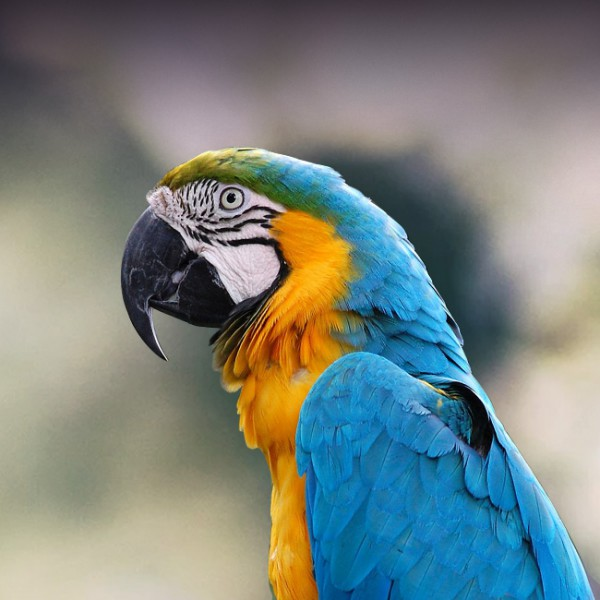

In [ ]:
original_image = Image.open('parrot.jpg')
original_image

In [ ]:
# Global Variables
width, height = original_image.size
width , height

(600, 600)

In [ ]:
# Open the image and print some pixels
original_image = np.array(original_image)
print(original_image[0,0,:])
pixels = original_image.reshape(-1, 3)  # Reshape to (height * width, 3)
print(pixels[0,:])

[46 39 47]
[46 39 47]


In [ ]:
def image_clustered(k,pixels = pixels,width = width,height = height,save = False):
    # Create and fit the KMeans model
    kmeans = KMeans(n_clusters=k, random_state=0,n_init = 'auto')
    kmeans.fit(pixels)
    cluster_centers = np.round(kmeans.cluster_centers_).astype(np.uint8)
    labels = kmeans.labels_
    data_with_clusters = cluster_centers[labels]
    data_with_clusters = data_with_clusters.reshape((height,width,3))
    image = Image.fromarray(data_with_clusters)
    if save == True:
      image.save(f'k_means_{k}.jpg', 'JPEG')
    return image,cluster_centers,labels

In [ ]:
def plot_original_clustered(clustered,k,original_image = original_image):
  plt.figure(figsize=(20,10))
  plt.subplot(1,2,1)
  plt.imshow(original_image)
  plt.title('original')
  plt.axis('off')

  plt.subplot(1,2,2)
  plt.imshow(clustered)
  plt.title(f'K-means {k}')
  plt.axis('off')

  plt.show()

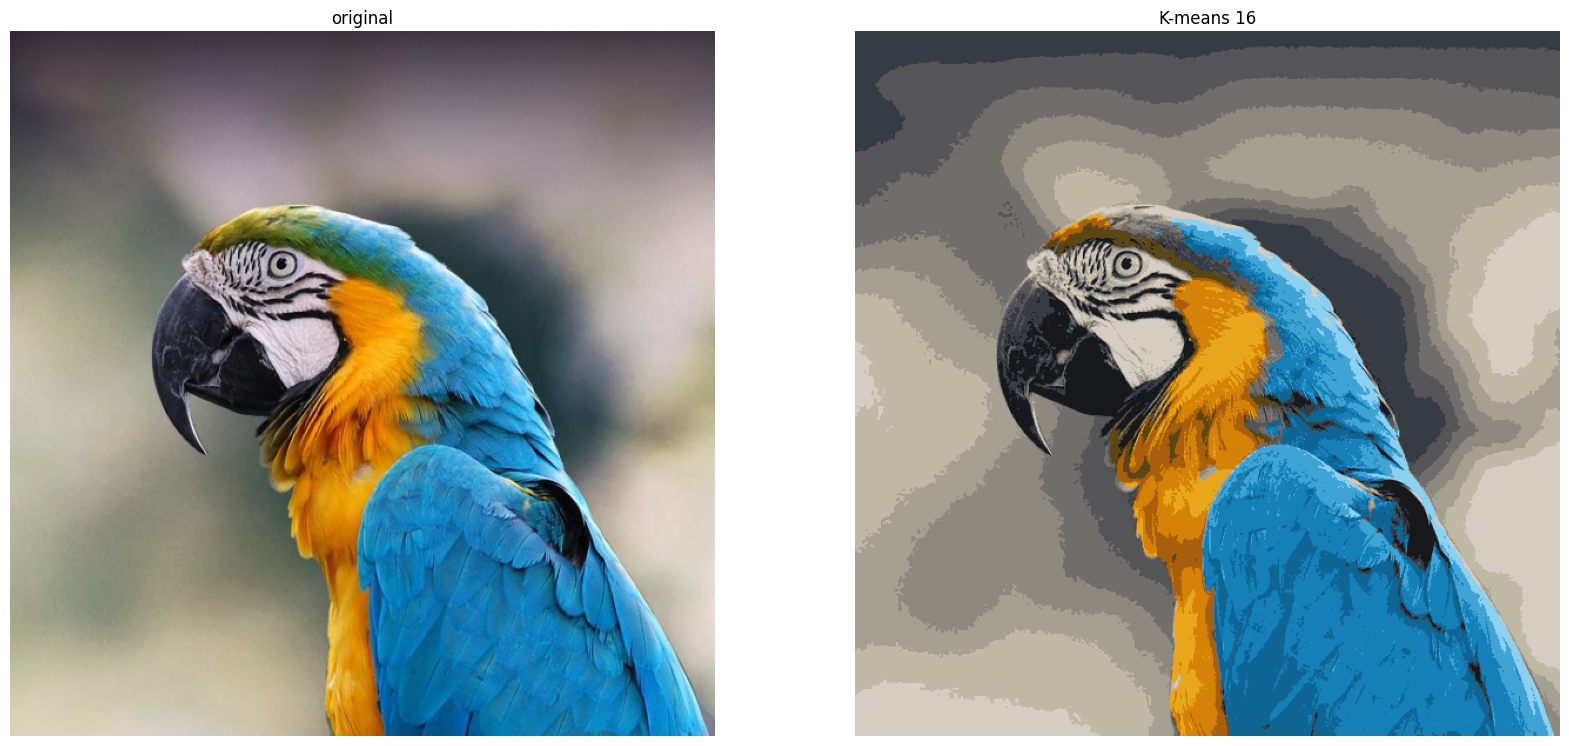

In [ ]:
k = 16
clustered,centers,labels = image_clustered(k = k,save = True)
plot_original_clustered(clustered,k)

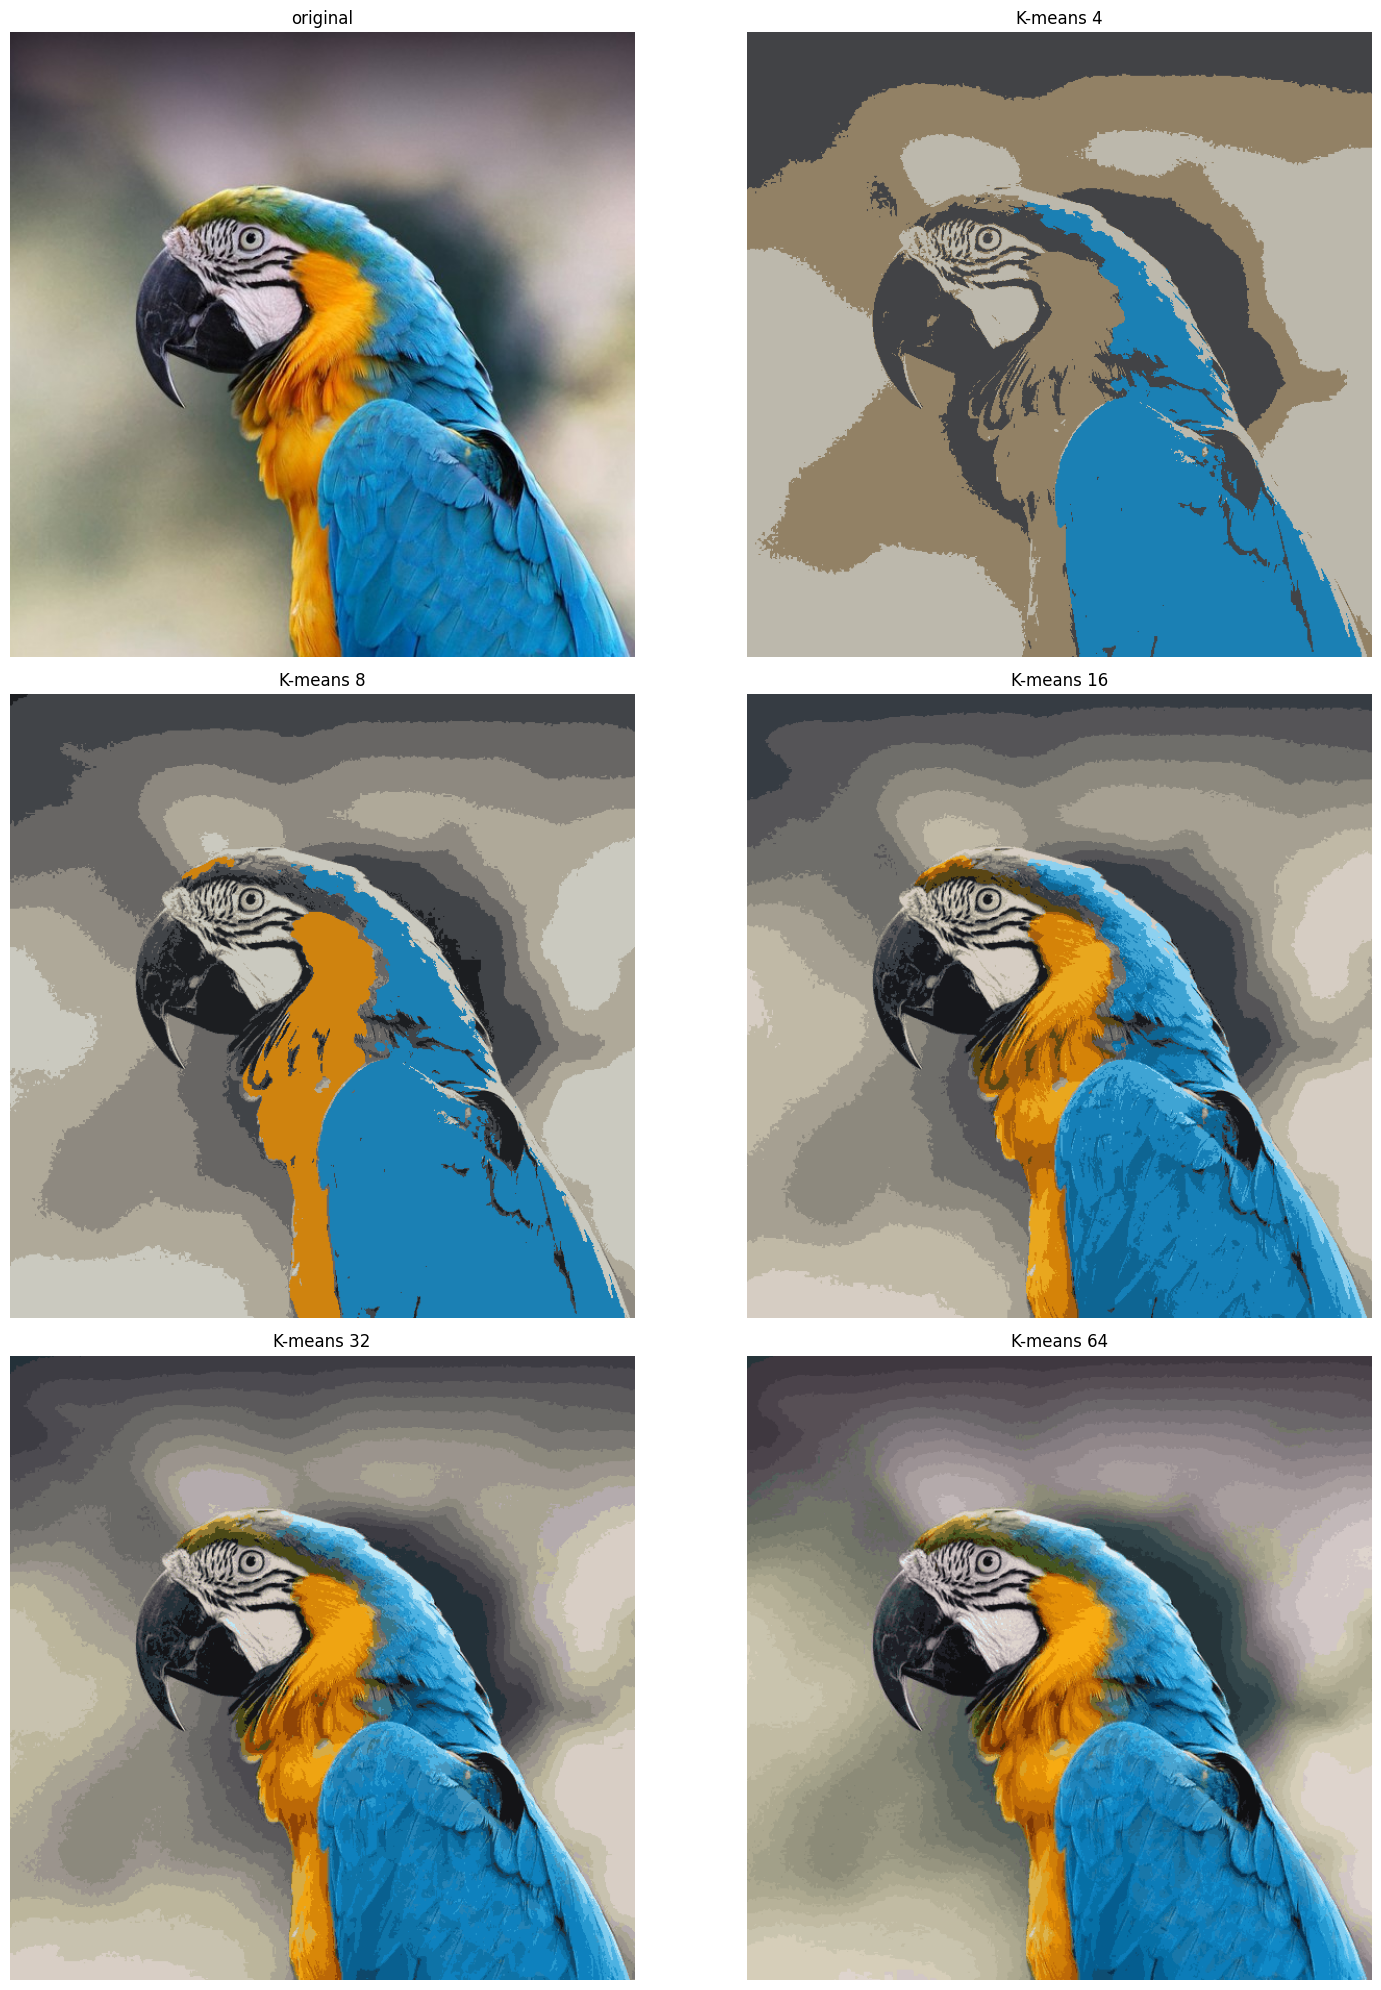

In [ ]:
centers = [4,8,16,32,64]
# visualisation
fig, axes = plt.subplots(3, 2, figsize=(16, 20))
axes = axes.flat
axes[0].imshow(original_image)
axes[0].set_title('original')
axes[0].axis('off')

for i,k in enumerate(centers) :
  # run model
  image,_,_ = image_clustered(k = k)

  # vis
  axes[i+1].imshow(image)
  axes[i+1].set_title(f'K-means {k}')
  axes[i+1].axis('off')
plt.tight_layout()
plt.show()

In [ ]:
import os
file_path = 'parrot.jpg'
file_size_bytes = os.path.getsize(file_path)
# Convert bytes to kilobytes (KB)
file_size_kb = file_size_bytes / 1024
print(f'Original file size: {file_size_kb:.2f} KB')

file_path = 'k_means_16.jpg'
file_size_bytes = os.path.getsize(file_path)
# Convert bytes to kilobytes (KB)
file_size_kb = file_size_bytes / 1024
print(f'K-menas file size: {file_size_kb:.2f} KB')

Original file size: 66.87 KB
K-menas file size: 42.30 KB
